# Extension Work: The Central Limit Theorem (Exercises)

In these exercises we again work with the Brexdex data

We are going to investigate how the sampling distribution of the mean depends on $n$, the relationship between SEM and $\sqrt{n}$, and how we assess whether a distribution, such as the sampling distribution of the mean, is Normal.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings 
warnings.simplefilter('ignore', category=FutureWarning)

## Import and plot the data

Let's remind ourselves of the dataset we are working with

Text(0, 0.5, 'frequency')

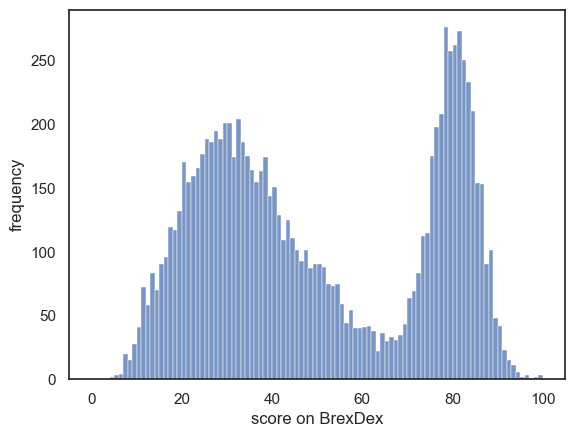

In [2]:
UKBrexdex=pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/UKBrexdex.csv')
sns.histplot(UKBrexdex['score'], bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')

How would you describe this data?
<ul>
<li> write some text, including descritive statatistics, to describe the distribution of Brexdex scores in the UK population
</ul>

## Sampling distribution of the mean when $n$ is small

Let's start by simulating what the sampling distribution of the mean looks like for small values of $n$ - starting with $n=1$

### $n=1$

Write some code to draw 10,000 samples with n=1, obtain the mean of each sample, and plot the means.

<b><i>Think</i></b>
<ul>
    <li> Before you run it, think: what will this 'sampling distribution of the mean' look like?
</ul>

In [3]:
# Your code here!

In fact when $n=1$, the sample mean is simply the value of the (one) person in the sample's score, so the sampling distribution of the mean is exactly the sample data distribution

### $n=2$

Write some code to draw 10,000 samples with n=2, obtain the mean of each sample, and plot the means.

In [4]:
# your code here!

Hopefully you have noticed a middle peak emerging.

<b><i>Think</i></b>-

A simple summary of the Brexdex distribution is that people are either pre-Brexit (belonging to the lower mode of the distribution, the hump of scores below 50%), or they are against Brexit (belonging to the upper mode).

If we draw a sample of $n=2$, there are four possible outomes:

<ol>
    <li> pro-pro
    <li> pro-against
    <li> against-pro
    <li> against-against
</ol>

Case 1 yeilds low scores, case 4 yeilds high scores, and cases 2 and 3 yeild intermediate scores.

How does this relate to the simulated sampling distribution of the mean you plotted?

# $n = 3,4,5$

As $n$ increases, we rapidly see a unimodal, bell-curve-like shape emerging

Write some code to simulate the sampling distribution of the mean for 10,000 samples each of $n=3,4,5$ and plot a histogram of the sample means for each value of $n$. Organise these plots as subplots next to or above each other (you decide which is more informative)

You can find an example that does similar, using a doulbe <tt>for</tt>-loop, in one of the preparatory workbooks for this week

In [5]:
# your code here

# What do we mean by 'when $n$ is large'?

The Central Limit Theorem states that the sampling distribution of the mean is estimated by $\mathcal{N}(\bar{x},\frac{s}{\sqrt{n}})$ when $n$ is large

How large is large enough?

A good rule of thumb is that the Central Limit Theorem applies for $n>50$, and a larger $n$ is required for a roughly normal sampling distribution when the data distribution is grossly non-normal (such as the bimodal Brexdex distribution). 

In reality, the normal distribution becomes a closer and closer fit tot the sampling distribution of the mean as $n$ gets larger

### $n=100$

Let's start with a value of $n$ for which the central limit theorem should definitely apply, $n=100$

Now, we work out the mean and SEM that would be predicted for the sampling distribution of the mean, if the central limit theorem applied.

Finally we compare the predicted normal distribution to the simulated sampling distribution of the mean in a plot

***Note -***
The code to get the normal curve and histogram to match in scale is a bit fiddly, don't worry about the details!

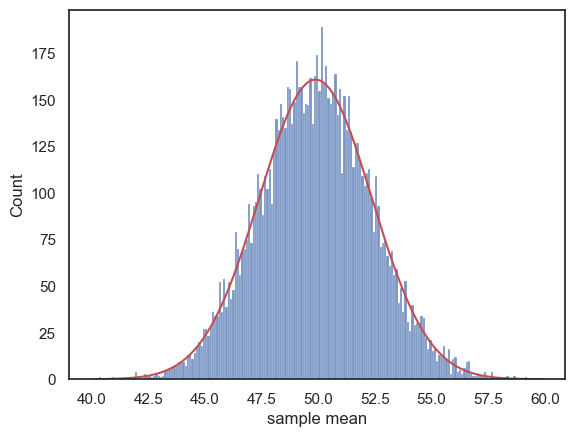

In [6]:
# first simulate the sampling distribution of the mean for 10,000 samples
nSamples = 10000
n = 100
m=np.empty(nSamples) # make an array to store the means
binwidth=0.1

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], n, replace=False)
    m[i]=sample.mean()
    
sns.histplot(m, bins=np.arange(40,60,binwidth))
 
# now work out the expected normal distribution
mu = UKBrexdex['score'].mean()
sigma = UKBrexdex['score'].std()
SEM = sigma/(n**0.5)

x = np.arange(40,60,binwidth) # x axis values - you may wat to change these once you have tried plotting it
p = stats.norm.pdf(x,mu,SEM)
freq = p*nSamples*binwidth # exected frequency in each ibn is probability of the bin * total nSamples * bin width

plt.plot(x,freq,'r')
plt.xlabel('sample mean')
plt.show()

This is clearly quite a good fit.

Now try changing $n$, in the code block above, to $n=4$ (<b><i>hint:</b></i> change the histogram bins and x-axis values to  <tt>np.arange(0,100,binwidth)</tt>, and change <tt>binwidth</tt> to 1)

Hopefully, you can see that although the histogram on its own looked quite normal, it is actually not a great fit to the normal distribution we would expect if the Central Limit Theorem applied - the peak is too flat and there are fewer sample means out in the tails than we would expect - the distribution looks like a piece of Toblerone

<img src= "https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/toblerone.png" width="30%"  />

### Q-Q plot

The differences in the peak and tails of the distribution can be hard to spot on a histogram/Normal plot as above.

A type of plot designed to make these clearer exists - it is called a Q-Q (quantile-quantile) plot. In the Q-Q plot, we plot the quantiles of the data distribution (in this case our 10,000 simulated sample means) against the quantiles of the normal distribution.

If our data distribution was normal, the points would all fall on a straight line, but here we see the deviation at the tails of the distribution, reflecting the difference between the triangular tails of the simulated sampling distribution as opposed to the finely tapered tails of the normal distribution.

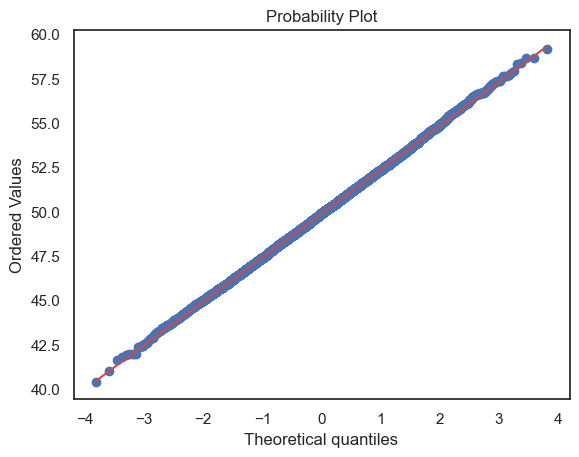

In [7]:
stats.probplot(m, plot=plt)
plt.show()

<ul>
    <li>Try changing <i>n</i> back to some larger value such as 10 ot 100 in the code block above and remaking the Q-Q plot. 
</ul>

You should see the tails of the sampling distribution (in both he histogram and the Q-Q plot) start to match the normal distribution

<ul>
    <li>Try setting <i>n=2</i> in the code block above and remaking the Q-Q plot. 
</ul>

You should see the funny three-peak histogram - how is the shape of the histogram reflected in the Q-Q plot?